<a href="https://colab.research.google.com/github/hmtrii/tirg/blob/main/Retrieve_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download

In [1]:
!rm -rf /content/Fashion200k
!mkdir /content/Fashion200k
!mkdir /content/Fashion200k/women

In [2]:
# Download tập labesl và test_queries.txt
!gdown "https://drive.google.com/uc?id=1-NA4vTjXCdpC-a14bITfU2LxbzpGecQ7"

Downloading...
From: https://drive.google.com/uc?id=1-NA4vTjXCdpC-a14bITfU2LxbzpGecQ7
To: /content/labels_and_test_queries.zip
2.81MB [00:00, 43.9MB/s]


In [3]:
!unzip /content/labels_and_test_queries.zip -d /content/Fashion200k

Archive:  /content/labels_and_test_queries.zip
   creating: /content/Fashion200k/labels/
  inflating: /content/Fashion200k/labels/pants_test_detect_all.txt  
  inflating: /content/Fashion200k/labels/dress_train_detect_all.txt  
  inflating: /content/Fashion200k/labels/skirt_train_detect_all.txt  
  inflating: /content/Fashion200k/labels/top_train_detect_all.txt  
  inflating: /content/Fashion200k/labels/dress_test_detect_all.txt  
  inflating: /content/Fashion200k/labels/top_test_detect_all.txt  
  inflating: /content/Fashion200k/labels/jacket_train_detect_all.txt  
  inflating: /content/Fashion200k/labels/skirt_test_detect_all.txt  
  inflating: /content/Fashion200k/labels/pants_train_detect_all.txt  
  inflating: /content/Fashion200k/labels/jacket_test_detect_all.txt  
  inflating: /content/Fashion200k/test_queries.txt  


In [4]:
#Download hình ảnh
!gdown "https://drive.google.com/uc?id=0B4Eo9mft9jwoc20xdkQ0UmtGUGM"

Downloading...
From: https://drive.google.com/uc?id=0B4Eo9mft9jwoc20xdkQ0UmtGUGM
To: /content/women.tar.gz
5.86GB [01:56, 50.2MB/s]


In [5]:
!tar -xf /content/women.tar.gz -C /content/Fashion200k/women

In [6]:
#Download pretrained model
!gdown "https://drive.google.com/uc?id=1-pzLmtStfZZjxlNznZ_Fx_OK_93qDDR4"

Downloading...
From: https://drive.google.com/uc?id=1-pzLmtStfZZjxlNznZ_Fx_OK_93qDDR4
To: /content/best_checkpoint.pth
75.2MB [00:00, 194MB/s]


In [7]:
# Download các pre-computed
!gdown "https://drive.google.com/uc?id=1-OihRljbJpvfkz5Nyh7YLkD6LOQ5U8eV"

Downloading...
From: https://drive.google.com/uc?id=1-OihRljbJpvfkz5Nyh7YLkD6LOQ5U8eV
To: /content/pkls.zip
223MB [00:02, 92.3MB/s]


In [8]:
!unzip /content/pkls.zip -d /content/pkls

Archive:  /content/pkls.zip
  inflating: /content/pkls/all_captions.pkl  
  inflating: /content/pkls/all_imgs.pkl  
  inflating: /content/pkls/all_norm_imgs_feature.pkl  
  inflating: /content/pkls/all_norm_queries_feature.pkl  
  inflating: /content/pkls/all_queries.pkl  
  inflating: /content/pkls/all_target_captions.pkl  
  inflating: /content/pkls/img_ids.pkl  
  inflating: /content/pkls/mods.pkl  


# Install

In [9]:
!git clone https://github.com/hmtrii/tirg.git

Cloning into 'tirg'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 159 (delta 87), reused 102 (delta 42), pack-reused 0
Receiving objects: 100% (159/159), 8.90 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [10]:
!pip install tensorboardX

     |████████████████████████████████| 317kB 16.1MB/s 


In [11]:
!pip install torch==1.2.0 torchvision==0.4.0    

     |████████████████████████████████| 748.9MB 20kB/s 
     |████████████████████████████████| 8.8MB 48.0MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [12]:
!pip install Pillow==5.2.0

     |████████████████████████████████| 2.0MB 15.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


Remember restart runtime after above cells

#Compute

In [1]:
cd /content/tirg

/content/tirg


In [2]:
from test_retrieval import test
from main import load_dataset, create_model_and_optimizer
from tools import pkl
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import PIL

In [3]:
class Opt:
    def __init__(self):
        self.dataset = "fashion200k"
        self.dataset_path = "/content/Fashion200k"
        self.batch_size = 32
        self.embed_dim = 512
        self.hashing = True
        self.retrieve_by_random = True
        self.model = "tirg"
        self.learning_rate = 1e-2
        self.weight_decay = 1e-6
        self.pretrained_model = "/content/best_checkpoint.pth"

In [4]:
opt = Opt()
trainset, testset = load_dataset(opt)
model, _ = create_model_and_optimizer(opt, [t for t in trainset.get_all_texts()])
model.eval()

Reading dataset  fashion200k
read dress_train_detect_all.txt
read skirt_train_detect_all.txt
read top_train_detect_all.txt
read jacket_train_detect_all.txt
read pants_train_detect_all.txt
Fashion200k: 172049 images
53099 unique captions
Modifiable images 106464
read pants_test_detect_all.txt
read dress_test_detect_all.txt
read top_test_detect_all.txt
read skirt_test_detect_all.txt
read jacket_test_detect_all.txt
Fashion200k: 29789 images
trainset size: 172049
testset size: 29789
Creating model and optimizer for tirg


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 153MB/s]


Load checkpoint from /content/best_checkpoint.pth


TIRG(
  (normalization_layer): NormalizationLayer()
  (soft_triplet_loss): TripletLoss()
  (img_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [5]:
all_imgs_feature = pkl.pkl_load("/content/pkls/all_imgs.pkl")
all_captions = pkl.pkl_load("/content/pkls/all_captions.pkl")
all_queries_feature = pkl.pkl_load("/content/pkls/all_queries.pkl")
all_target_captions = pkl.pkl_load("/content/pkls/all_target_captions.pkl")
img_ids = pkl.pkl_load("/content/pkls/img_ids.pkl")
mods = pkl.pkl_load("/content/pkls/mods.pkl")
all_norm_imgs_feature = pkl.pkl_load("/content/pkls/all_norm_imgs_feature.pkl")
all_norm_queries_feature = pkl.pkl_load("/content/pkls/all_norm_queries_feature.pkl")

#Retrieve a random query

In [6]:
test_queries = testset.get_test_queries()
sims = all_norm_queries_feature[:3000].dot(all_norm_imgs_feature.T)
for i, t in enumerate(test_queries):
    try:
        sims[i, t['source_img_id']] = -10e10
    except:
        pass
nn_result = [np.argsort(-sims[i, :])[:100] for i in range(sims.shape[0])]

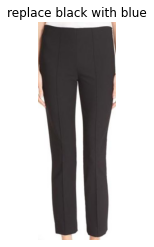

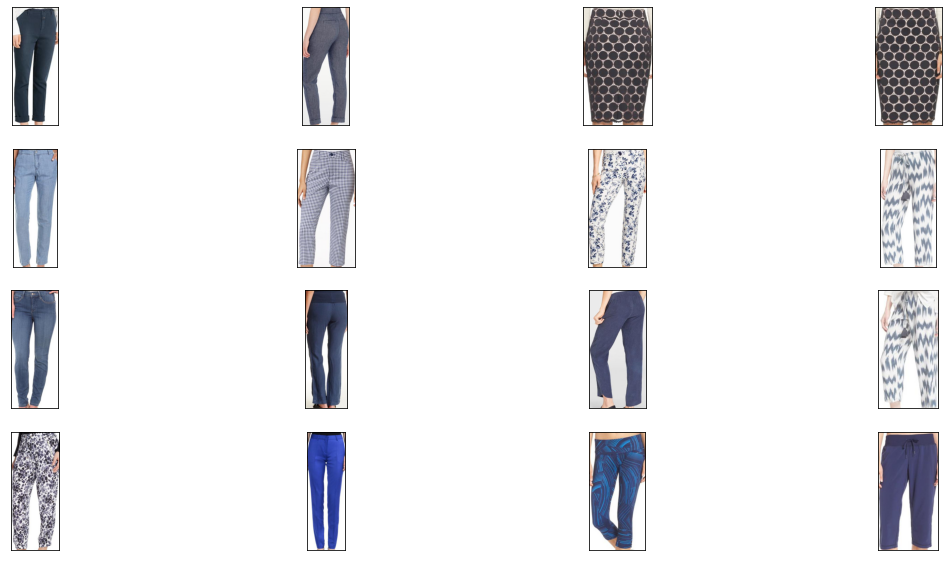

In [9]:
chosen_idx = np.random.randint(0, 3000)
true_idx = img_ids[chosen_idx]
im = testset.get_img(true_idx, raw_img=True)
plt.imshow(im)
plt.axis("off")
mod = mods[chosen_idx]
plt.title(mod)

# Plot output
plt.figure(figsize=(20,10))
plt.axis('off')
width = 4
height = 4
for i in range(width*height):
    plt.subplot(width,height,i+1)
    plt.xticks([])
    plt.yticks([])
    idx = nn_result[chosen_idx][i]
    # print(idx)
    img = testset.get_img(int(idx), raw_img=True)
    plt.imshow(img)
    
    if idx == all_target_captions[chosen_idx]:
        plt.title("GT")
plt.show()

#Retrieve a custom query

In [10]:
transform=torchvision.transforms.Compose([
            torchvision.transforms.Resize(224),
            torchvision.transforms.CenterCrop(224),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize([0.485, 0.456, 0.406],
                                                [0.229, 0.224, 0.225])
            ])

In [14]:
%cd /content
!gdown "https://drive.google.com/uc?id=1LeWaDfqcI2phhkwSxMFmiO0tweH8vbS1"

/content
Downloading...
From: https://drive.google.com/uc?id=1LeWaDfqcI2phhkwSxMFmiO0tweH8vbS1
To: /content/thayhuan.png
100% 253k/253k [00:00<00:00, 8.11MB/s]


In [15]:
# Thay đường dẫn ảnh ở đây
link = "/content/thayhuan.png"
with open(link,"rb") as f:
    query_img_raw = PIL.Image.open(f).convert("RGB")
query_img = transform(query_img_raw)
query_img = [query_img]
query_img = torch.stack(query_img).float()
query_img = torch.autograd.Variable(query_img).cuda()
# Thay câu miêu tả
query_text = ["replace red with brown"]

query_feature = model.compose_img_text(query_img, query_text).data.cpu().numpy()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


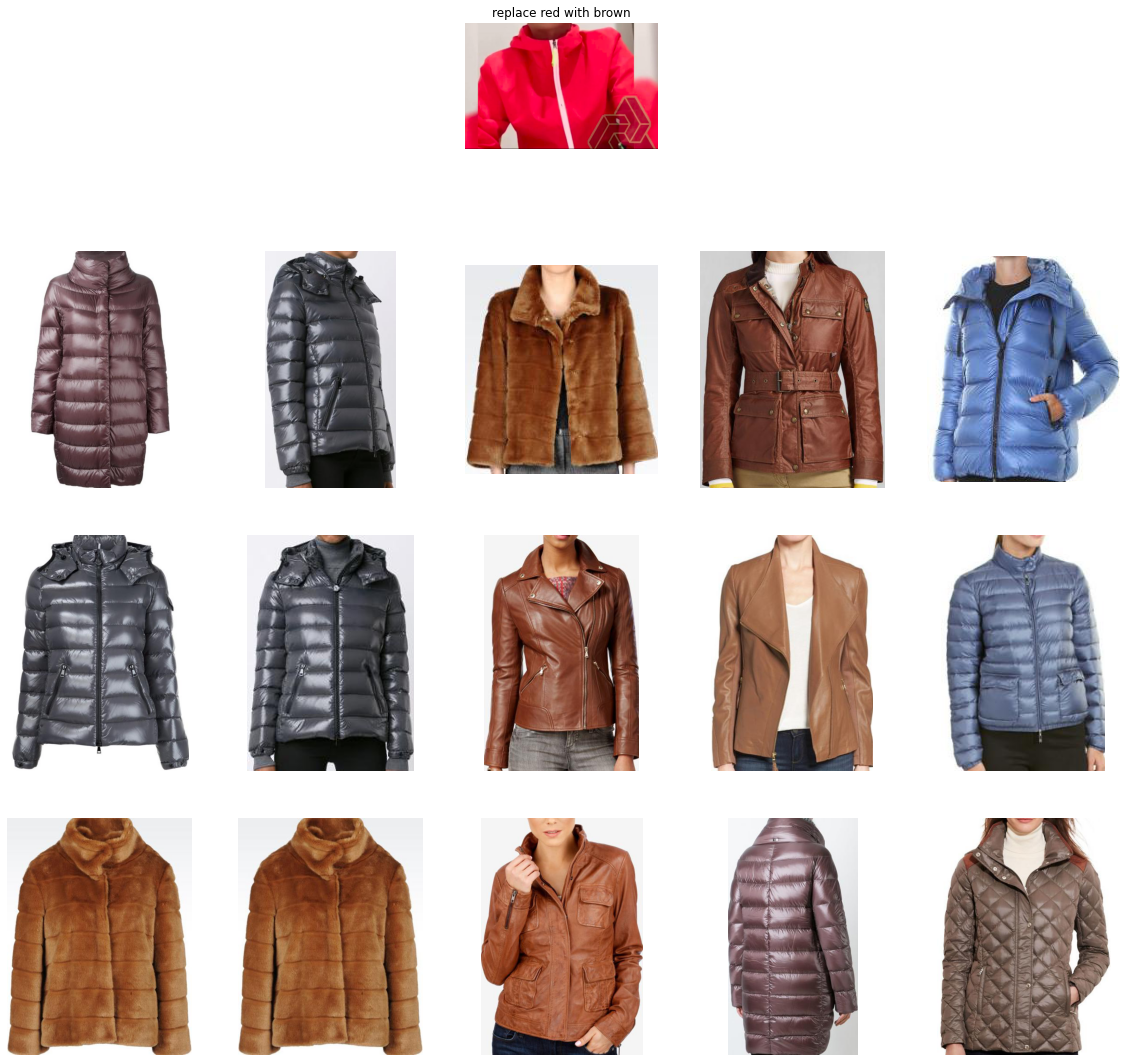

In [16]:
sims = query_feature.dot(all_norm_imgs_feature.T)
nn_result = np.argsort(-sims[0, :])[:100]

c = 5
r = 4
fig = plt.figure(figsize=(20, 20))
# Show query
fig.add_subplot(r, c, 3)
plt.imshow(query_img_raw)
plt.title(query_text[0])
plt.axis("off")
# Show output
k = 15
for i in range(k):
    img = testset.get_img(int(nn_result[i]), raw_img=True)
    fig.add_subplot(r, c, i+6)
    plt.imshow(img)
    plt.axis('off')

plt.show()